In [1]:
import os
import sys
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

In [2]:
# =================================
# Add the parent directory to the Python path
def get_parent_dir():
    try:
        # Works when running a script
        current_dir = os.path.dirname(__file__)
    except NameError:
        # Works in notebooks / REPL
        current_dir = os.getcwd()
    return os.path.abspath(os.path.join(current_dir, '..'))

parent_dir = get_parent_dir()
sys.path.append(parent_dir)
# =================================

from ML_toolbox.d_PCA import MyPCA

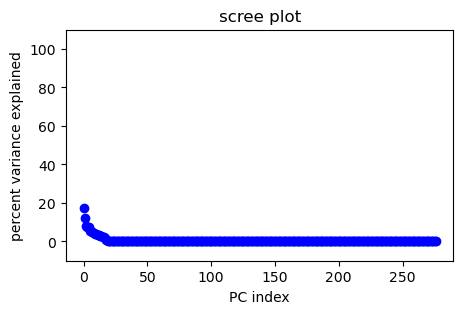

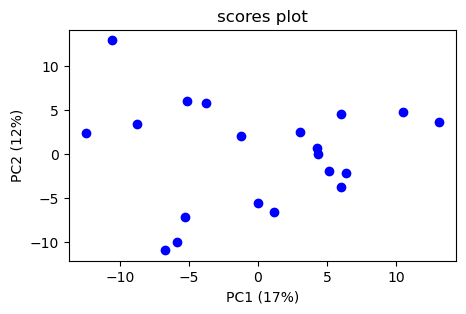

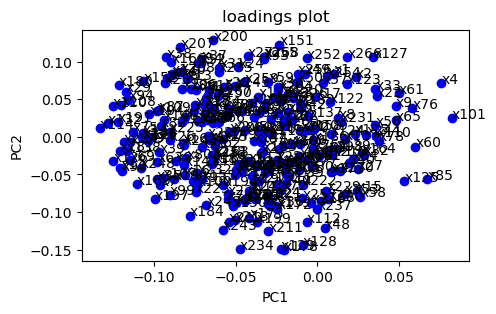

In [3]:
in_file_name = 'Homework_2_dataset_prob4.csv'

current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
in_file_full_name = os.path.join(root_dir, 'data', in_file_name)

data_in_df = pd.read_csv(in_file_full_name, header=0, index_col=0)

data_in_standardized = StandardScaler().fit_transform(data_in_df.T)

num_of_samples = data_in_standardized.shape[0]
num_of_variables = data_in_standardized.shape[1]

# use my own PCA class
my_pca_obj = MyPCA(n_components=min(num_of_samples, num_of_variables))
pca_results = my_pca_obj.fit_transform(data_in_standardized)
my_pca_obj.plot_results()

Text(0, 0.5, 'PC 2 (12.0%)')

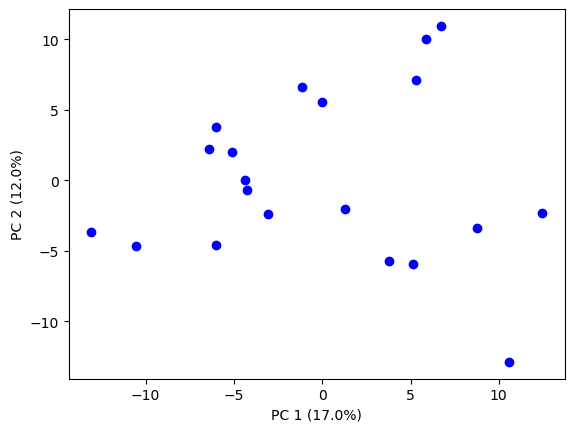

In [4]:
# use sklearn PCA
sklearn_pca_obj = PCA(n_components=min(num_of_samples, num_of_variables))
sklearn_pca_obj.fit(data_in_standardized)
sklearn_pca_scores = sklearn_pca_obj.fit_transform(data_in_standardized)

fig, ax = plt.subplots()
ax.scatter(sklearn_pca_scores[:, 0], sklearn_pca_scores[:, 1], c='blue')
pc1_percentage = round(sklearn_pca_obj.explained_variance_ratio_[0] * 100, 0)
pc2_percentage = round(sklearn_pca_obj.explained_variance_ratio_[1] * 100, 0)
ax.set_xlabel(f'PC 1 ({pc1_percentage}%)')
ax.set_ylabel(f'PC 2 ({pc2_percentage}%)')